# Dr. Simon Shnoll 'Cosmosphysical' Histogram  Tool

This tool implements the data analysis steps taken in [Cosmophysical Factors in Stochastic Processes](http://shnoll.ptep-online.com/publications.html).

Full reference:<br>
Shnoll S. E. Cosmophysical Factors in Stochastic Processes. American Research Press, Rehoboth (NM), 2012

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [179]:
class Shnoll:
    
    def __init__(self):
        self.BINS = 100
        self.WINDOW = 4
        self.NSMOOTH = 10
        self.N = 100

    #generate self.NRANDOM * self.RANDOMRANGE 2D-array of random integers and store as csv
    def generate_sample_data(self):
        data = np.random.randint(0,2**63,self.N,dtype=np.int64)
        np.save('data/data',data)
        return 'Data succesfully generated and stored in ./data/data.npy'

    #takes integer, returns number of binary 1's in the integer
    def hamming_weight(self, n):
        c = 0
        while n:
            c += 1
            n &= n - 1
        return c

    #takes array of integers, returns int32 array of computed hamming weights
    def hamming_weight_array(self, arr):
        a = []
        for i in arr:
            a.append(self.hamming_weight(i))
        return a
    
    #takes timeseries data, returns x and y values for a line histogram
    def linehist(self, data):
        y, x = np.histogram(data,bins=self.BINS)
        x = 0.5*(x[1:]+x[:-1])
        return x, y
    
    #takes array of integers, returns array of smoothed values 
    def smooth(self, arr):
        arr = pd.Series(arr)
        for i in range(self.NSMOOTH):
            arr = arr.rolling(self.WINDOW,center=True,min_periods=1).mean()
        return arr
    
    #plot
    def plot(self, x, y):
        f, ax = plt.subplots()
        plt.plot(x,y)
        return plt.show()
    
    #plot n smoothed histograms
    def plot_histograms(self):
        a = np.load('data/data.npy')
        a = self.hamming_weight_array(a)
        x, y = self.linehist(a)
        y = self.smooth(y)
        self.plot(x,y)

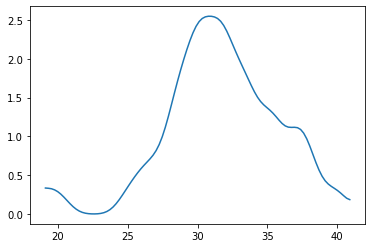

In [180]:
#Create new class instance 
shnoll = Shnoll()

#generate random data
shnoll.generate_sample_data()

#plot historgram
shnoll.plot_histograms()